In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import requests

## 네이버 주가 정보 가져오기

In [2]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=035420&page=1'

In [3]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
response = requests.get(url,headers=headers)

In [4]:
response.text

'\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버 금융</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210721200146/css/world.css">\n</head>\n<body>\n<script

In [5]:
html = bs(response.text,'html.parser')
html_table = html.select("table")
len(html_table)

2

In [6]:
table = pd.read_html(str(html_table))
table[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.07.23,452000.0,12000.0,443500.0,454500.0,441000.0,1059964.0
2,2021.07.22,440000.0,12000.0,433000.0,445000.0,429000.0,1035882.0
3,2021.07.21,428000.0,11000.0,443000.0,446000.0,428000.0,885519.0
4,2021.07.20,439000.0,4000.0,438500.0,441500.0,431000.0,789090.0
5,2021.07.19,443000.0,4000.0,443000.0,449500.0,438500.0,704307.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021.07.16,447000.0,2000.0,448000.0,461000.0,443000.0,1246425.0


In [7]:
table[0].dropna()

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.07.23,452000.0,12000.0,443500.0,454500.0,441000.0,1059964.0
2,2021.07.22,440000.0,12000.0,433000.0,445000.0,429000.0,1035882.0
3,2021.07.21,428000.0,11000.0,443000.0,446000.0,428000.0,885519.0
4,2021.07.20,439000.0,4000.0,438500.0,441500.0,431000.0,789090.0
5,2021.07.19,443000.0,4000.0,443000.0,449500.0,438500.0,704307.0
9,2021.07.16,447000.0,2000.0,448000.0,461000.0,443000.0,1246425.0
10,2021.07.15,449000.0,5000.0,446500.0,452500.0,439500.0,950460.0
11,2021.07.14,444000.0,3000.0,436000.0,444500.0,436000.0,931990.0
12,2021.07.13,441000.0,22500.0,421000.0,442000.0,419000.0,1498546.0
13,2021.07.12,418500.0,3000.0,418500.0,421500.0,413000.0,475697.0


```table[0]```는 dropna로 결측치 제거 필요

In [8]:
table[1]

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


```table[1]```은 필요 없음

In [9]:
table[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      10 non-null     object 
 1   종가      10 non-null     float64
 2   전일비     10 non-null     float64
 3   시가      10 non-null     float64
 4   고가      10 non-null     float64
 5   저가      10 non-null     float64
 6   거래량     10 non-null     float64
dtypes: float64(6), object(1)
memory usage: 968.0+ bytes


In [10]:
df = pd.DataFrame()
default_url = "https://finance.naver.com/item/sise_day.nhn?code=035420"
for page in range(1,100): #99페이지에 대해 데이터 가져오기
  url = "{}&page={}".format(default_url, page)
  print(url)

  response = requests.get(url, headers = headers)
  html = bs(response.text,'html.parser')
  html_table = html.select("table")
  table = pd.read_html(str(html_table))

  df = df.append(table[0].dropna())

https://finance.naver.com/item/sise_day.nhn?code=035420&page=1
https://finance.naver.com/item/sise_day.nhn?code=035420&page=2
https://finance.naver.com/item/sise_day.nhn?code=035420&page=3
https://finance.naver.com/item/sise_day.nhn?code=035420&page=4
https://finance.naver.com/item/sise_day.nhn?code=035420&page=5
https://finance.naver.com/item/sise_day.nhn?code=035420&page=6
https://finance.naver.com/item/sise_day.nhn?code=035420&page=7
https://finance.naver.com/item/sise_day.nhn?code=035420&page=8
https://finance.naver.com/item/sise_day.nhn?code=035420&page=9
https://finance.naver.com/item/sise_day.nhn?code=035420&page=10
https://finance.naver.com/item/sise_day.nhn?code=035420&page=11
https://finance.naver.com/item/sise_day.nhn?code=035420&page=12
https://finance.naver.com/item/sise_day.nhn?code=035420&page=13
https://finance.naver.com/item/sise_day.nhn?code=035420&page=14
https://finance.naver.com/item/sise_day.nhn?code=035420&page=15
https://finance.naver.com/item/sise_day.nhn?code=

In [11]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.07.23,452000.0,12000.0,443500.0,454500.0,441000.0,1059964.0
2,2021.07.22,440000.0,12000.0,433000.0,445000.0,429000.0,1035882.0
3,2021.07.21,428000.0,11000.0,443000.0,446000.0,428000.0,885519.0
4,2021.07.20,439000.0,4000.0,438500.0,441500.0,431000.0,789090.0
5,2021.07.19,443000.0,4000.0,443000.0,449500.0,438500.0,704307.0
...,...,...,...,...,...,...,...
9,2017.07.20,835000.0,0.0,833000.0,842000.0,827000.0,63638.0
10,2017.07.19,835000.0,5000.0,831000.0,842000.0,830000.0,69438.0
11,2017.07.18,830000.0,9000.0,841000.0,844000.0,826000.0,63292.0
12,2017.07.17,839000.0,0.0,840000.0,844000.0,835000.0,84952.0


## Matplotlib 차트

In [12]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 1 to 13
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      990 non-null    bool 
 1   종가      990 non-null    bool 
 2   전일비     990 non-null    bool 
 3   시가      990 non-null    bool 
 4   고가      990 non-null    bool 
 5   저가      990 non-null    bool 
 6   거래량     990 non-null    bool 
dtypes: bool(7)
memory usage: 14.5 KB


**최근 데이터 30행**만 사용하고 **날짜를 오름차순으**로 변경

In [13]:
df = df.iloc[0:30]
df = df.sort_values(by='날짜')
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,2021.06.14,387000.0,14500.0,377500.0,388000.0,375500.0,1208589.0
12,2021.06.15,387000.0,0.0,387000.0,389000.0,381500.0,625594.0
11,2021.06.16,391000.0,4000.0,384500.0,395000.0,383000.0,836281.0
10,2021.06.17,389500.0,1500.0,389500.0,394500.0,385000.0,670522.0
9,2021.06.18,398000.0,8500.0,391500.0,400500.0,391000.0,1268656.0
5,2021.06.21,397000.0,1000.0,398000.0,402000.0,392000.0,809114.0
4,2021.06.22,391000.0,6000.0,400000.0,400500.0,391000.0,702840.0
3,2021.06.23,423500.0,32500.0,393000.0,427000.0,392500.0,2721355.0
2,2021.06.24,419500.0,4000.0,430000.0,436000.0,413000.0,2143286.0
1,2021.06.25,410000.0,9500.0,420000.0,420000.0,405000.0,1382051.0


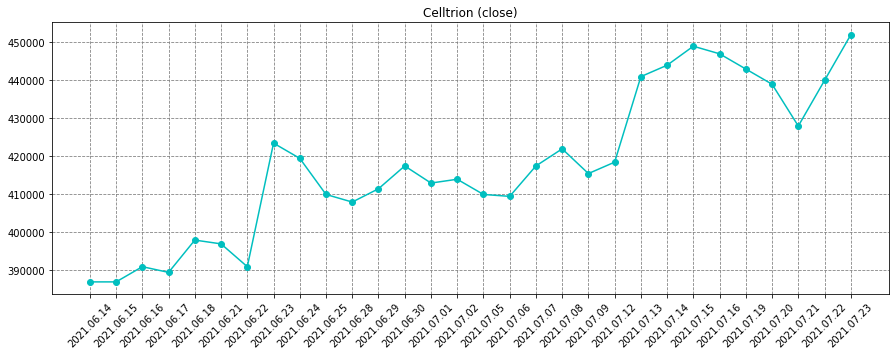

In [14]:
plt.figure(figsize=(15, 5)) 
plt.title('Celltrion (close)')
plt.xticks(rotation=45) 
plt.plot(df.날짜, df.종가, 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

- x축 레이블의 날짜가 겹쳐서 보기어려우므로 90도 회전하여 표시
- x축은 날짜 데이터로 y축은 종가 데이터로 출력

## 캔들 차트

In [15]:
!pip install --upgrade mplfinance #신버전

     |████████████████████████████████| 62 kB 987 kB/s 


In [16]:
import mplfinance as mpf

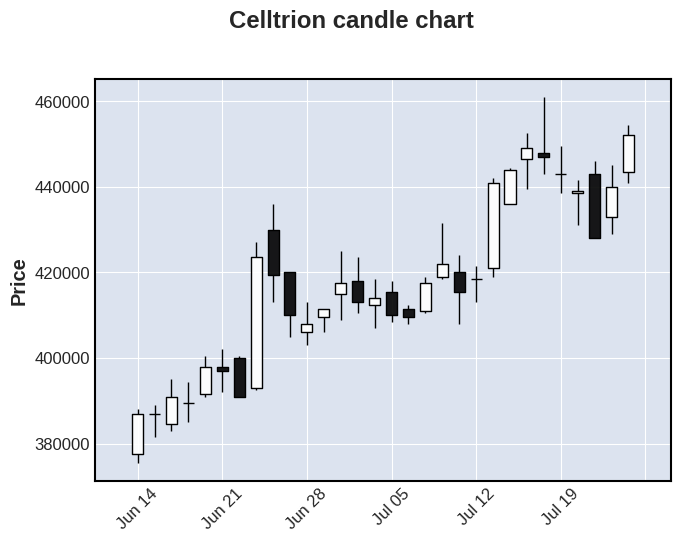

In [17]:
# 한글 컬럼명을 영어 컬럼명으로 변경
df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})

# 날짜 오름차순으로 변경
# df = df.sort_values(by='Date')

# Date 컬럼을 DatetimeIndex 타입으로 변경 후 인덱스로 설정
df.index = pd.to_datetime(df.Date)

# Open, High, Low, Close, Volume 컬럼만 갖도록 데이터프레임 구조 변경
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# 캔들 차트 그리기
mpf.plot(df, title='Celltrion candle chart', type='candle')

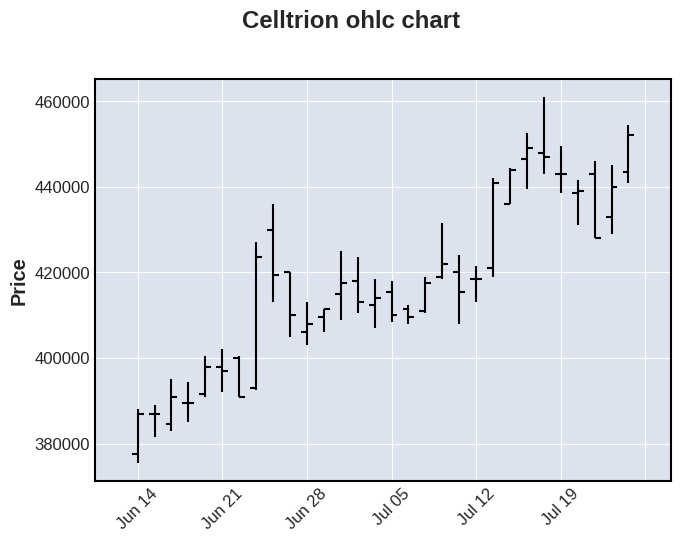

In [18]:
# 다른 종류의 차트
mpf.plot(df, title='Celltrion ohlc chart', type='ohlc')

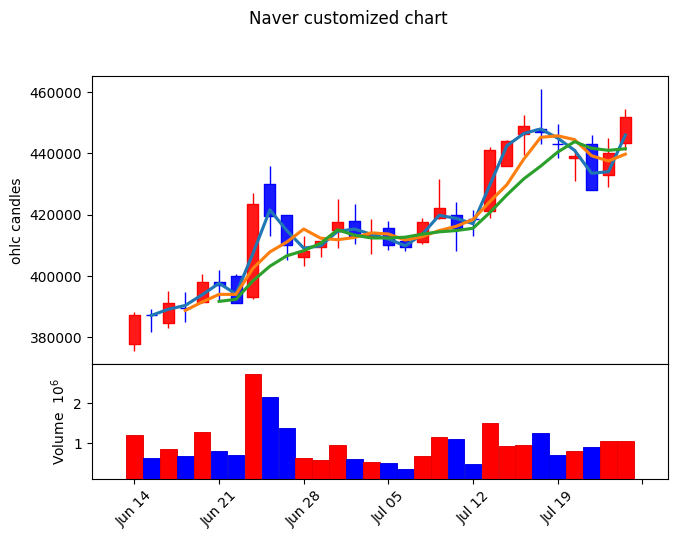

In [19]:
# kwargs는 mpf.plot() 함수를 호출할 때 쓰이는 여러 인수를 담는 딕셔너리
kwargs = dict(title='Naver customized chart', type='candle', mav=(2, 4, 6), volume=True, ylabel='ohlc candles')

# 상승은 red, 하락은 blue로 지정
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)

# 네이버 시세 OHLVC 데이터와 kwargs로 설정한 인수들과 스타일 객체를 인수로 넘겨주면서
# mpf.plot() 함수를 호출하여 차트를 출력
mpf.plot(df, **kwargs, style=s)